## Practical Work 2

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [239]:
import numpy as np
import matplotlib.pyplot as plt

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [240]:
def obj_func(x):
    return  -2*x + 1
x = np.linspace(0,20)
y = obj_func(x)
print(x.shape)
print(x)
print(y.shape)
print(y)

(50,)
[ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
 12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
 14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
 17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
 19.59183673 20.        ]
(50,)
[  1.           0.18367347  -0.63265306  -1.44897959  -2.26530612
  -3.08163265  -3.89795918  -4.71428571  -5.53061224  -6.34693878
  -7.16326531  -7.97959184  -8.79591837  -9.6122449  -10.42857143
 -11.24489796 -12.06122449 -12.87755102 -13.69387755 -14.51020408
 -15.32653061 -16.14285714 -16.95918367 -17.7755102  -18.59183673
 -19.40816327 -20.2244898  -21.04081633 -21.85714

In [241]:
x = x.reshape((50,1))
y = y.reshape((50,1))
# data = np.concatenate((x,y),axis=1)
# data = np.random.shuffle(data)
print(x.shape)
print(x)
print(y.shape)
print(y)

(50, 1)
[[ 0.        ]
 [ 0.40816327]
 [ 0.81632653]
 [ 1.2244898 ]
 [ 1.63265306]
 [ 2.04081633]
 [ 2.44897959]
 [ 2.85714286]
 [ 3.26530612]
 [ 3.67346939]
 [ 4.08163265]
 [ 4.48979592]
 [ 4.89795918]
 [ 5.30612245]
 [ 5.71428571]
 [ 6.12244898]
 [ 6.53061224]
 [ 6.93877551]
 [ 7.34693878]
 [ 7.75510204]
 [ 8.16326531]
 [ 8.57142857]
 [ 8.97959184]
 [ 9.3877551 ]
 [ 9.79591837]
 [10.20408163]
 [10.6122449 ]
 [11.02040816]
 [11.42857143]
 [11.83673469]
 [12.24489796]
 [12.65306122]
 [13.06122449]
 [13.46938776]
 [13.87755102]
 [14.28571429]
 [14.69387755]
 [15.10204082]
 [15.51020408]
 [15.91836735]
 [16.32653061]
 [16.73469388]
 [17.14285714]
 [17.55102041]
 [17.95918367]
 [18.36734694]
 [18.7755102 ]
 [19.18367347]
 [19.59183673]
 [20.        ]]
(50, 1)
[[  1.        ]
 [  0.18367347]
 [ -0.63265306]
 [ -1.44897959]
 [ -2.26530612]
 [ -3.08163265]
 [ -3.89795918]
 [ -4.71428571]
 [ -5.53061224]
 [ -6.34693878]
 [ -7.16326531]
 [ -7.97959184]
 [ -8.79591837]
 [ -9.6122449 ]
 [-10.428

In [242]:
x = np.concatenate((np.ones((x.shape[0],1)),x),axis=1)
print(x.shape)
print(x)

(50, 2)
[[ 1.          0.        ]
 [ 1.          0.40816327]
 [ 1.          0.81632653]
 [ 1.          1.2244898 ]
 [ 1.          1.63265306]
 [ 1.          2.04081633]
 [ 1.          2.44897959]
 [ 1.          2.85714286]
 [ 1.          3.26530612]
 [ 1.          3.67346939]
 [ 1.          4.08163265]
 [ 1.          4.48979592]
 [ 1.          4.89795918]
 [ 1.          5.30612245]
 [ 1.          5.71428571]
 [ 1.          6.12244898]
 [ 1.          6.53061224]
 [ 1.          6.93877551]
 [ 1.          7.34693878]
 [ 1.          7.75510204]
 [ 1.          8.16326531]
 [ 1.          8.57142857]
 [ 1.          8.97959184]
 [ 1.          9.3877551 ]
 [ 1.          9.79591837]
 [ 1.         10.20408163]
 [ 1.         10.6122449 ]
 [ 1.         11.02040816]
 [ 1.         11.42857143]
 [ 1.         11.83673469]
 [ 1.         12.24489796]
 [ 1.         12.65306122]
 [ 1.         13.06122449]
 [ 1.         13.46938776]
 [ 1.         13.87755102]
 [ 1.         14.28571429]
 [ 1.         14.693

In [243]:
#inializing theta
theta = np.zeros((1,x.shape[1]))
print(theta)
print(theta.shape)

[[0. 0.]]
(1, 2)


In [244]:
x[0:15].shape[0]

15

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Note: you can choose any suitable stop criteria.

In [245]:
# cost function
def cost(x, y, theta):
    # x(13,2) . theta(1,2) = h(13,1)
    h_x = x @ theta.T
    error = ((h_x - y).T @ (h_x - y))/2*x.shape[0]
    return error[0,0]

In [246]:
def grad (x, y, theta):
    # x(13,2) @ theta(1,2) = h(13,1)
    h_x = x @ theta.T
    # x(13,2) - h(13,1) = g(13,1)
    grad = x.T @ (h_x - y) / x.shape[0]
    return grad.T

#### Try your function with any input parameterss of your choice.

In [247]:
def BGD (x, y, theta_min, it, alpha, batch):
    step = int(x.shape[0]/batch)
    pred = [x @ theta_min.T]
    thetas = [theta_min]            # a list of thetas (list of arrays (1,2))
    error = [cost(x[0:step], y[0:step], theta_min)]  # a list of output of cost function (list of values)
    for i in range(it):
        for j in range(0, x.shape[0], step):
            theta_min = theta_min - alpha * grad(x[j:j+step], y[j:j+step], theta_min)
            error.append(cost(x[j:j+step], y[j:j+step], theta_min))
            thetas.append(theta_min)
            pred.append(x @ theta_min.T)
    return thetas, theta_min, error, pred

#### Calculate r2 score

In [248]:
epochs = 100
alpha = 0.01
batch = 10
thetas, theta_min, cost, pred = BGD (x, y, theta, epochs, alpha, batch) 
print(theta_min)
print(cost[-1])
print(thetas[-1])

[[ 0.82161477 -1.99116032]]
0.0012951296829855766
[[ 0.82161477 -1.99116032]]


In [249]:
print(len(pred))
print(len(pred[-1]))

1001
50


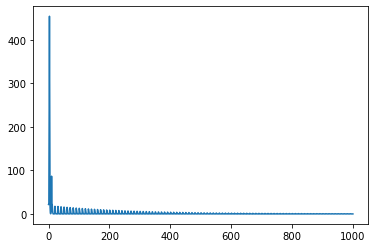

In [250]:
plt.plot(range(len(cost)),cost)  #range(len(cost)) is the number of iterations 

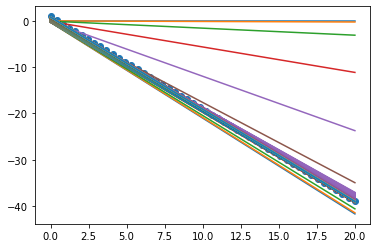

In [251]:
plt.scatter(x[:,1],y)
for i in  pred:
    plt.plot(x[:,1],i)

In [252]:
f = x @ theta_min.T
print(np.concatenate((f,y),axis=1))

[[ 8.21614768e-01  1.00000000e+00]
 [ 8.89627089e-03  1.83673469e-01]
 [-8.03822226e-01 -6.32653061e-01]
 [-1.61654072e+00 -1.44897959e+00]
 [-2.42925922e+00 -2.26530612e+00]
 [-3.24197772e+00 -3.08163265e+00]
 [-4.05469621e+00 -3.89795918e+00]
 [-4.86741471e+00 -4.71428571e+00]
 [-5.68013321e+00 -5.53061224e+00]
 [-6.49285170e+00 -6.34693878e+00]
 [-7.30557020e+00 -7.16326531e+00]
 [-8.11828870e+00 -7.97959184e+00]
 [-8.93100719e+00 -8.79591837e+00]
 [-9.74372569e+00 -9.61224490e+00]
 [-1.05564442e+01 -1.04285714e+01]
 [-1.13691627e+01 -1.12448980e+01]
 [-1.21818812e+01 -1.20612245e+01]
 [-1.29945997e+01 -1.28775510e+01]
 [-1.38073182e+01 -1.36938776e+01]
 [-1.46200367e+01 -1.45102041e+01]
 [-1.54327552e+01 -1.53265306e+01]
 [-1.62454737e+01 -1.61428571e+01]
 [-1.70581922e+01 -1.69591837e+01]
 [-1.78709107e+01 -1.77755102e+01]
 [-1.86836292e+01 -1.85918367e+01]
 [-1.94963477e+01 -1.94081633e+01]
 [-2.03090661e+01 -2.02244898e+01]
 [-2.11217846e+01 -2.10408163e+01]
 [-2.19345031e+01 -2

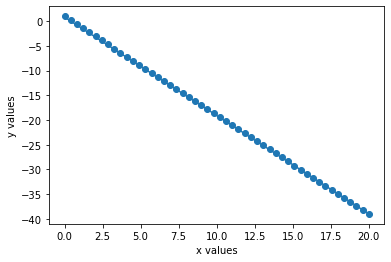

In [253]:
_ = plt.scatter(x[:,1],y)
_ = plt.xlabel('x values')
_ = plt.ylabel('y values')
_ = plt.plot(x[:,1],f)

Text(0, 0.5, 'Cost Value')

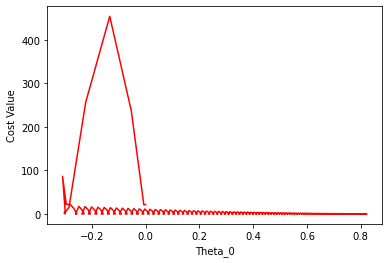

In [254]:
thetas = np.squeeze(np.array(thetas))
fig,ax = plt.subplots()
ax.plot(thetas[:,0], cost ,'r')

ax.set_xlabel('Theta_0')
ax.set_ylabel('Cost Value')

Text(0, 0.5, 'Cost Value')

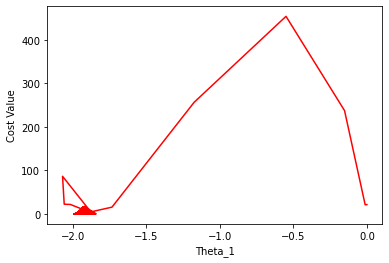

In [255]:
thetas = np.squeeze(np.array(thetas))
fig,ax = plt.subplots()
ax.plot(thetas[:,1], cost ,'r')

ax.set_xlabel('Theta_1')
ax.set_ylabel('Cost Value')

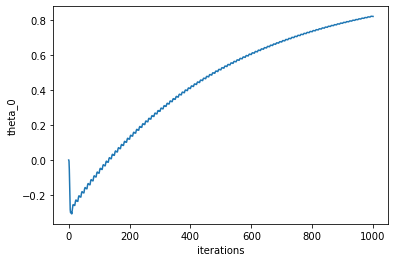

In [256]:
thetas = np.squeeze(np.array(thetas))
plt.plot(range(len(cost)),thetas[:,0])
_ = plt.xlabel('iterations')
_ = plt.ylabel('theta_0')

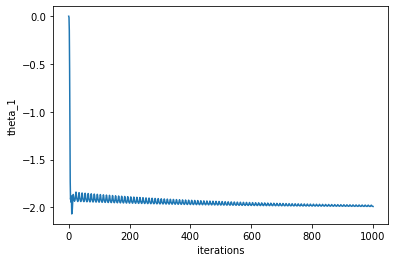

In [257]:
thetas = np.squeeze(np.array(thetas))
plt.plot(range(len(cost)),thetas[:,1])
_ = plt.xlabel('iterations')
_ = plt.ylabel('theta_1')

#### Plot loss vs. epochs

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

In [290]:
def obj_func(x):
    return  -2*x + 1
x = np.linspace(0,20)
y = obj_func(x)
print(x.shape)
print(x)
print(y.shape)
print(y)

(50,)
[ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
 12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
 14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
 17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
 19.59183673 20.        ]
(50,)
[  1.           0.18367347  -0.63265306  -1.44897959  -2.26530612
  -3.08163265  -3.89795918  -4.71428571  -5.53061224  -6.34693878
  -7.16326531  -7.97959184  -8.79591837  -9.6122449  -10.42857143
 -11.24489796 -12.06122449 -12.87755102 -13.69387755 -14.51020408
 -15.32653061 -16.14285714 -16.95918367 -17.7755102  -18.59183673
 -19.40816327 -20.2244898  -21.04081633 -21.85714

In [291]:
x = x.reshape((50,1))
y = y.reshape((50,1))
data = np.concatenate((x,y),axis=1)
np.random.shuffle(data)
print(data)
# print(x.shape)
# print(x)
# print(y.shape)
# print(y)

[[  8.16326531 -15.32653061]
 [  0.40816327   0.18367347]
 [ 11.02040816 -21.04081633]
 [  5.30612245  -9.6122449 ]
 [ 15.51020408 -30.02040816]
 [  6.53061224 -12.06122449]
 [ 17.55102041 -34.10204082]
 [  7.34693878 -13.69387755]
 [ 13.46938776 -25.93877551]
 [ 16.73469388 -32.46938776]
 [  1.2244898   -1.44897959]
 [ 11.42857143 -21.85714286]
 [  2.04081633  -3.08163265]
 [  5.71428571 -10.42857143]
 [  8.57142857 -16.14285714]
 [  7.75510204 -14.51020408]
 [  2.44897959  -3.89795918]
 [ 10.20408163 -19.40816327]
 [ 11.83673469 -22.67346939]
 [ 14.69387755 -28.3877551 ]
 [  3.26530612  -5.53061224]
 [ 19.59183673 -38.18367347]
 [  6.12244898 -11.24489796]
 [  9.3877551  -17.7755102 ]
 [  8.97959184 -16.95918367]
 [  6.93877551 -12.87755102]
 [ 15.10204082 -29.20408163]
 [  0.           1.        ]
 [ 12.65306122 -24.30612245]
 [ 20.         -39.        ]
 [ 12.24489796 -23.48979592]
 [  0.81632653  -0.63265306]
 [ 19.18367347 -37.36734694]
 [  3.67346939  -6.34693878]
 [  9.79591837

In [292]:
x = data[:,0]
y = data[:,1]
x = x.reshape((50,1))
y = y.reshape((50,1))
print(x.shape)
print(x)
print(y.shape)
print(y)

(50, 1)
[[ 8.16326531]
 [ 0.40816327]
 [11.02040816]
 [ 5.30612245]
 [15.51020408]
 [ 6.53061224]
 [17.55102041]
 [ 7.34693878]
 [13.46938776]
 [16.73469388]
 [ 1.2244898 ]
 [11.42857143]
 [ 2.04081633]
 [ 5.71428571]
 [ 8.57142857]
 [ 7.75510204]
 [ 2.44897959]
 [10.20408163]
 [11.83673469]
 [14.69387755]
 [ 3.26530612]
 [19.59183673]
 [ 6.12244898]
 [ 9.3877551 ]
 [ 8.97959184]
 [ 6.93877551]
 [15.10204082]
 [ 0.        ]
 [12.65306122]
 [20.        ]
 [12.24489796]
 [ 0.81632653]
 [19.18367347]
 [ 3.67346939]
 [ 9.79591837]
 [18.36734694]
 [ 1.63265306]
 [16.32653061]
 [10.6122449 ]
 [ 2.85714286]
 [14.28571429]
 [13.87755102]
 [17.95918367]
 [ 4.08163265]
 [15.91836735]
 [18.7755102 ]
 [ 4.48979592]
 [13.06122449]
 [17.14285714]
 [ 4.89795918]]
(50, 1)
[[-15.32653061]
 [  0.18367347]
 [-21.04081633]
 [ -9.6122449 ]
 [-30.02040816]
 [-12.06122449]
 [-34.10204082]
 [-13.69387755]
 [-25.93877551]
 [-32.46938776]
 [ -1.44897959]
 [-21.85714286]
 [ -3.08163265]
 [-10.42857143]
 [-16.142

In [293]:
x = np.concatenate((np.ones((x.shape[0],1)),x),axis=1)
print(x.shape)
print(x)

(50, 2)
[[ 1.          8.16326531]
 [ 1.          0.40816327]
 [ 1.         11.02040816]
 [ 1.          5.30612245]
 [ 1.         15.51020408]
 [ 1.          6.53061224]
 [ 1.         17.55102041]
 [ 1.          7.34693878]
 [ 1.         13.46938776]
 [ 1.         16.73469388]
 [ 1.          1.2244898 ]
 [ 1.         11.42857143]
 [ 1.          2.04081633]
 [ 1.          5.71428571]
 [ 1.          8.57142857]
 [ 1.          7.75510204]
 [ 1.          2.44897959]
 [ 1.         10.20408163]
 [ 1.         11.83673469]
 [ 1.         14.69387755]
 [ 1.          3.26530612]
 [ 1.         19.59183673]
 [ 1.          6.12244898]
 [ 1.          9.3877551 ]
 [ 1.          8.97959184]
 [ 1.          6.93877551]
 [ 1.         15.10204082]
 [ 1.          0.        ]
 [ 1.         12.65306122]
 [ 1.         20.        ]
 [ 1.         12.24489796]
 [ 1.          0.81632653]
 [ 1.         19.18367347]
 [ 1.          3.67346939]
 [ 1.          9.79591837]
 [ 1.         18.36734694]
 [ 1.          1.632

In [294]:
#inializing theta
theta = np.zeros((1,x.shape[1]))
print(theta)
print(theta.shape)

[[0. 0.]]
(1, 2)


In [295]:
# cost function
def cost(x, y, theta):
    # x(13,2) . theta(1,2) = h(13,1)
    h_x = x @ theta.T
    error = ((h_x - y).T @ (h_x - y))/2*x.shape[0]
    return error[0,0]

In [296]:
def grad (x, y, theta):
    # x(13,2) . theta(1,2) = h(13,1)
    h_x = x @ theta.T
    # x(13,2) - h(13,1) = g(13,1)
    grad = x.T @ (h_x - y) / x.shape[0]
    return grad.T

In [297]:
def BGD (x, y, theta_min, it, alpha, batch):
    step = int(x.shape[0]/batch)
    pred = [x @ theta_min.T]
    thetas = [theta_min]            # a list of thetas (list of arrays (1,2))
    error = [cost(x[0:step], y[0:step], theta_min)]  # a list of output of cost function (list of values)
    for i in range(it):
        for j in range(0, x.shape[0], step):
            if (j>0 and abs(error[-1]- error[-2])<=1e-10):
                print(f"diverage after {i} iterations")
                break
            theta_min = theta_min - alpha * grad(x[j:j+step], y[j:j+step], theta_min)
            error.append(cost(x[j:j+step], y[j:j+step], theta_min))
            thetas.append(theta_min)
            pred.append(x @ theta_min.T)
    return thetas, theta_min, error, pred

In [298]:
epochs = 100
alpha = 0.01
batch = 10
thetas, theta_min, cost, pred = BGD (x, y, theta, epochs, alpha, batch) 
print(theta_min)
print(cost[-1])
print(thetas[-1])

[[ 0.91054314 -1.99400384]]
0.020894622772494615
[[ 0.91054314 -1.99400384]]


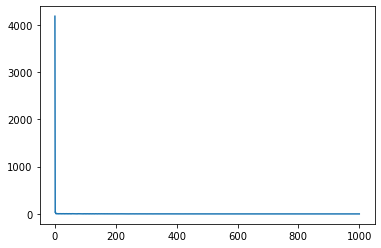

In [299]:
plt.plot(range(len(cost)),cost)  #range(len(cost)) is the number of iterations 

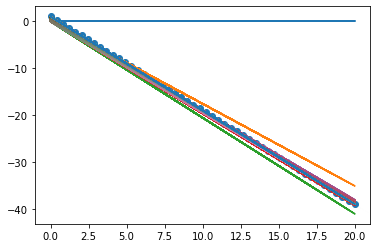

In [300]:
plt.scatter(x[:,1],y)
for i in  pred:
    plt.plot(x[:,1],i)

In [301]:
f = x @ theta_min.T
print(np.concatenate((f,y),axis=1))

[[-15.36703923 -15.32653061]
 [  0.09666402   0.18367347]
 [-21.06419306 -21.04081633]
 [ -9.6698854   -9.6122449 ]
 [-30.01686336 -30.02040816]
 [-12.11152276 -12.06122449]
 [-34.08625895 -34.10204082]
 [-13.73928099 -13.69387755]
 [-25.94746777 -25.93877551]
 [-32.45850071 -32.46938776]
 [ -1.53109422  -1.44897959]
 [-21.87807218 -21.85714286]
 [ -3.15885246  -3.08163265]
 [-10.48376452 -10.42857143]
 [-16.18091835 -16.14285714]
 [-14.55316011 -14.51020408]
 [ -3.97273157  -3.89795918]
 [-19.43643482 -19.40816327]
 [-22.69195129 -22.67346939]
 [-28.38910512 -28.3877551 ]
 [ -5.60048981  -5.53061224]
 [-38.15565454 -38.18367347]
 [-11.29764364 -11.24489796]
 [-17.80867658 -17.7755102 ]
 [-16.99479747 -16.95918367]
 [-12.92540188 -12.87755102]
 [-29.20298424 -29.20408163]
 [  0.91054314   1.        ]
 [-24.31970953 -24.30612245]
 [-38.96953366 -39.        ]
 [-23.50583041 -23.48979592]
 [ -0.7172151   -0.63265306]
 [-37.34177542 -37.36734694]
 [ -6.41436893  -6.34693878]
 [-18.6225557 

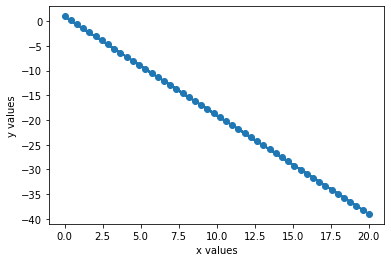

In [302]:
_ = plt.scatter(x[:,1],y)
_ = plt.xlabel('x values')
_ = plt.ylabel('y values')
_ = plt.plot(x[:,1],f)

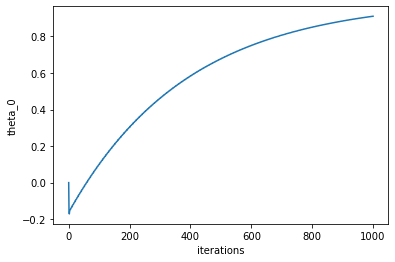

In [303]:
thetas = np.squeeze(np.array(thetas))
plt.plot(range(len(cost)),thetas[:,0])
_ = plt.xlabel('iterations')
_ = plt.ylabel('theta_0')

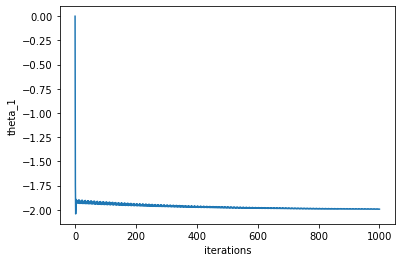

In [304]:
thetas = np.squeeze(np.array(thetas))
plt.plot(range(len(cost)),thetas[:,1])
_ = plt.xlabel('iterations')
_ = plt.ylabel('theta_1')

(1001, 2)


Text(0, 0.5, 'Cost Value')

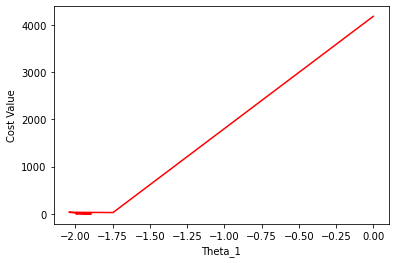

In [305]:
thetas = np.squeeze(np.array(thetas))
print(thetas.shape)
fig,ax = plt.subplots()
ax.plot(thetas[:,1], cost ,'r')

ax.set_xlabel('Theta_1')
ax.set_ylabel('Cost Value')

(1001, 2)


Text(0, 0.5, 'Cost Value')

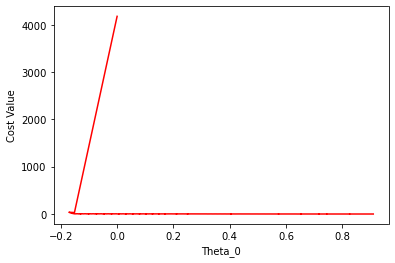

In [306]:
thetas = np.squeeze(np.array(thetas))
print(thetas.shape)
fig,ax = plt.subplots()
ax.plot(thetas[:,0], cost ,'r')

ax.set_xlabel('Theta_0')
ax.set_ylabel('Cost Value')

#### Plot all regression lines till converge

#### Plot the best regression line

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

#### Update the implementation of the Batch GD to be Mini-Batch and repeat the above plots and evaluations
#### Change batch size and see the effect
### Note: Try once without shuffling the data and once with shuffle and see the effect on the output.

## Stochastic GD

#### Update the implementation of the Batch GD to beStochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to Batch and Mini-Batch GD
### Note: Try once without shuffling the data and once with shuffle and see the effect on the output.

In [275]:
import numpy as np
import matplotlib.pyplot as plt

In [276]:
def obj_func(x):
    return  -2*x + 1
x = np.linspace(0,20)
y = obj_func(x)
print(x.shape)
print(x)
print(y.shape)
print(y)

(50,)
[ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
 12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
 14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
 17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
 19.59183673 20.        ]
(50,)
[  1.           0.18367347  -0.63265306  -1.44897959  -2.26530612
  -3.08163265  -3.89795918  -4.71428571  -5.53061224  -6.34693878
  -7.16326531  -7.97959184  -8.79591837  -9.6122449  -10.42857143
 -11.24489796 -12.06122449 -12.87755102 -13.69387755 -14.51020408
 -15.32653061 -16.14285714 -16.95918367 -17.7755102  -18.59183673
 -19.40816327 -20.2244898  -21.04081633 -21.85714

In [277]:
x = x.reshape((50,1))
y = y.reshape((50,1))
# data = np.concatenate((x,y),axis=1)
# data = np.random.shuffle(data)
print(x.shape)
print(x)
print(y.shape)
print(y)

(50, 1)
[[ 0.        ]
 [ 0.40816327]
 [ 0.81632653]
 [ 1.2244898 ]
 [ 1.63265306]
 [ 2.04081633]
 [ 2.44897959]
 [ 2.85714286]
 [ 3.26530612]
 [ 3.67346939]
 [ 4.08163265]
 [ 4.48979592]
 [ 4.89795918]
 [ 5.30612245]
 [ 5.71428571]
 [ 6.12244898]
 [ 6.53061224]
 [ 6.93877551]
 [ 7.34693878]
 [ 7.75510204]
 [ 8.16326531]
 [ 8.57142857]
 [ 8.97959184]
 [ 9.3877551 ]
 [ 9.79591837]
 [10.20408163]
 [10.6122449 ]
 [11.02040816]
 [11.42857143]
 [11.83673469]
 [12.24489796]
 [12.65306122]
 [13.06122449]
 [13.46938776]
 [13.87755102]
 [14.28571429]
 [14.69387755]
 [15.10204082]
 [15.51020408]
 [15.91836735]
 [16.32653061]
 [16.73469388]
 [17.14285714]
 [17.55102041]
 [17.95918367]
 [18.36734694]
 [18.7755102 ]
 [19.18367347]
 [19.59183673]
 [20.        ]]
(50, 1)
[[  1.        ]
 [  0.18367347]
 [ -0.63265306]
 [ -1.44897959]
 [ -2.26530612]
 [ -3.08163265]
 [ -3.89795918]
 [ -4.71428571]
 [ -5.53061224]
 [ -6.34693878]
 [ -7.16326531]
 [ -7.97959184]
 [ -8.79591837]
 [ -9.6122449 ]
 [-10.428

In [278]:
x = np.concatenate((np.ones((x.shape[0],1)),x),axis=1)
print(x.shape)
print(x)

(50, 2)
[[ 1.          0.        ]
 [ 1.          0.40816327]
 [ 1.          0.81632653]
 [ 1.          1.2244898 ]
 [ 1.          1.63265306]
 [ 1.          2.04081633]
 [ 1.          2.44897959]
 [ 1.          2.85714286]
 [ 1.          3.26530612]
 [ 1.          3.67346939]
 [ 1.          4.08163265]
 [ 1.          4.48979592]
 [ 1.          4.89795918]
 [ 1.          5.30612245]
 [ 1.          5.71428571]
 [ 1.          6.12244898]
 [ 1.          6.53061224]
 [ 1.          6.93877551]
 [ 1.          7.34693878]
 [ 1.          7.75510204]
 [ 1.          8.16326531]
 [ 1.          8.57142857]
 [ 1.          8.97959184]
 [ 1.          9.3877551 ]
 [ 1.          9.79591837]
 [ 1.         10.20408163]
 [ 1.         10.6122449 ]
 [ 1.         11.02040816]
 [ 1.         11.42857143]
 [ 1.         11.83673469]
 [ 1.         12.24489796]
 [ 1.         12.65306122]
 [ 1.         13.06122449]
 [ 1.         13.46938776]
 [ 1.         13.87755102]
 [ 1.         14.28571429]
 [ 1.         14.693

In [279]:
#inializing theta
theta = np.zeros((1,x.shape[1]))
print(theta)
print(theta.shape)

[[0. 0.]]
(1, 2)


In [280]:
# cost function
def cost(x, y, theta):
    # x(13,2) . theta(1,2) = h(13,1)
    h_x = x @ theta.T
    error = ((h_x - y).T @ (h_x - y))/2*x.shape[0]
    return error[0,0]

In [281]:
def grad (x, y, theta):
    # x(13,2) @ theta(1,2) = h(13,1)
    h_x = x @ theta.T
    # x(13,2) - h(13,1) = g(13,1)
    grad = x.T @ (h_x - y) / x.shape[0]
    return grad.T

In [282]:
def Stochastic (x, y, theta_min, it, alpha):
    step = 1
    pred = [x @ theta_min.T]
    thetas = [theta_min]            # a list of thetas (list of arrays (1,2))
    error = [cost(x[0:step], y[0:step], theta_min)]  # a list of output of cost function (list of values)
    for i in range(it):
        for j in range(0, x.shape[0], step):
            theta_min = theta_min - alpha * grad(x[j:j+step], y[j:j+step], theta_min)
            error.append(cost(x[j:j+step], y[j:j+step], theta_min))
            thetas.append(theta_min)
            pred.append(x @ theta_min.T)
    return thetas, theta_min, error, pred

In [283]:
epochs = 100
alpha = 0.01
batch = 1
thetas, theta_min, cost, pred = Stochastic (x, y, theta, epochs, alpha) 
print(theta_min)
print(cost[-1])
print(thetas[-1])

[[ 0.99795093 -1.99989912]]
4.921327200588996e-10
[[ 0.99795093 -1.99989912]]


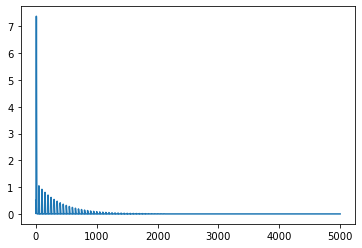

In [284]:
plt.plot(range(len(cost)),cost)  #range(len(cost)) is the number of iterations 

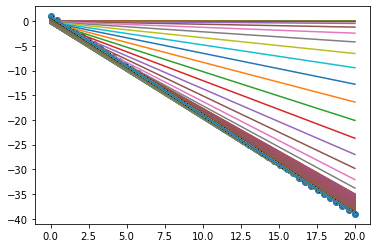

In [285]:
plt.scatter(x[:,1],y)
for i in  pred:
    plt.plot(x[:,1],i)

In [286]:
f = x @ theta_min.T
print(np.concatenate((f,y),axis=1))

[[  0.99795093   1.        ]
 [  0.18166558   0.18367347]
 [ -0.63461978  -0.63265306]
 [ -1.45090513  -1.44897959]
 [ -2.26719048  -2.26530612]
 [ -3.08347583  -3.08163265]
 [ -3.89976119  -3.89795918]
 [ -4.71604654  -4.71428571]
 [ -5.53233189  -5.53061224]
 [ -6.34861725  -6.34693878]
 [ -7.1649026   -7.16326531]
 [ -7.98118795  -7.97959184]
 [ -8.79747331  -8.79591837]
 [ -9.61375866  -9.6122449 ]
 [-10.43004401 -10.42857143]
 [-11.24632937 -11.24489796]
 [-12.06261472 -12.06122449]
 [-12.87890007 -12.87755102]
 [-13.69518543 -13.69387755]
 [-14.51147078 -14.51020408]
 [-15.32775613 -15.32653061]
 [-16.14404148 -16.14285714]
 [-16.96032684 -16.95918367]
 [-17.77661219 -17.7755102 ]
 [-18.59289754 -18.59183673]
 [-19.4091829  -19.40816327]
 [-20.22546825 -20.2244898 ]
 [-21.0417536  -21.04081633]
 [-21.85803896 -21.85714286]
 [-22.67432431 -22.67346939]
 [-23.49060966 -23.48979592]
 [-24.30689502 -24.30612245]
 [-25.12318037 -25.12244898]
 [-25.93946572 -25.93877551]
 [-26.75575108

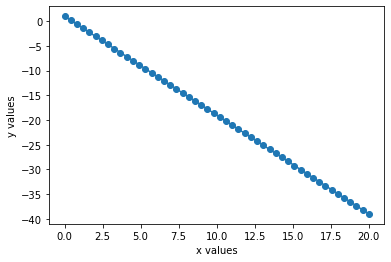

In [287]:
_ = plt.scatter(x[:,1],y)
_ = plt.xlabel('x values')
_ = plt.ylabel('y values')
_ = plt.plot(x[:,1],f)

Text(0, 0.5, 'Cost Value')

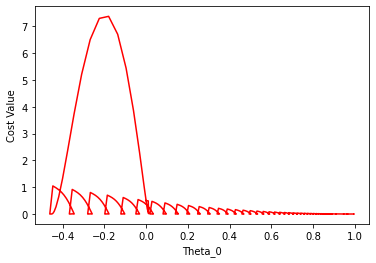

In [288]:
thetas = np.squeeze(np.array(thetas))
fig,ax = plt.subplots()
ax.plot(thetas[:,0], cost ,'r')

ax.set_xlabel('Theta_0')
ax.set_ylabel('Cost Value')

Text(0, 0.5, 'Cost Value')

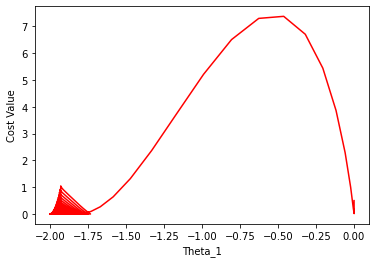

In [289]:
thetas = np.squeeze(np.array(thetas))
fig,ax = plt.subplots()
ax.plot(thetas[:,1], cost ,'r')

ax.set_xlabel('Theta_1')
ax.set_ylabel('Cost Value')

In [307]:
def obj_func(x):
    return  -2*x + 1
x = np.linspace(0,20)
y = obj_func(x)
print(x.shape)
print(x)
print(y.shape)
print(y)

(50,)
[ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
 12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
 14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
 17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
 19.59183673 20.        ]
(50,)
[  1.           0.18367347  -0.63265306  -1.44897959  -2.26530612
  -3.08163265  -3.89795918  -4.71428571  -5.53061224  -6.34693878
  -7.16326531  -7.97959184  -8.79591837  -9.6122449  -10.42857143
 -11.24489796 -12.06122449 -12.87755102 -13.69387755 -14.51020408
 -15.32653061 -16.14285714 -16.95918367 -17.7755102  -18.59183673
 -19.40816327 -20.2244898  -21.04081633 -21.85714

In [308]:
x = x.reshape((50,1))
y = y.reshape((50,1))
data = np.concatenate((x,y),axis=1)
np.random.shuffle(data)
print(data)
# print(x.shape)
# print(x)
# print(y.shape)
# print(y)

[[ 19.18367347 -37.36734694]
 [ 14.28571429 -27.57142857]
 [ 20.         -39.        ]
 [ 11.42857143 -21.85714286]
 [  3.26530612  -5.53061224]
 [  0.81632653  -0.63265306]
 [  6.93877551 -12.87755102]
 [ 18.7755102  -36.55102041]
 [  0.40816327   0.18367347]
 [ 11.02040816 -21.04081633]
 [  8.57142857 -16.14285714]
 [  8.16326531 -15.32653061]
 [  9.79591837 -18.59183673]
 [  2.44897959  -3.89795918]
 [ 19.59183673 -38.18367347]
 [  5.30612245  -9.6122449 ]
 [ 17.95918367 -34.91836735]
 [  6.53061224 -12.06122449]
 [ 12.24489796 -23.48979592]
 [  6.12244898 -11.24489796]
 [ 16.32653061 -31.65306122]
 [  7.75510204 -14.51020408]
 [ 16.73469388 -32.46938776]
 [  4.89795918  -8.79591837]
 [  2.04081633  -3.08163265]
 [  1.63265306  -2.26530612]
 [ 15.10204082 -29.20408163]
 [ 10.6122449  -20.2244898 ]
 [ 15.91836735 -30.83673469]
 [ 14.69387755 -28.3877551 ]
 [  8.97959184 -16.95918367]
 [  1.2244898   -1.44897959]
 [  2.85714286  -4.71428571]
 [ 11.83673469 -22.67346939]
 [  7.34693878

In [309]:
x = data[:,0]
y = data[:,1]
x = x.reshape((50,1))
y = y.reshape((50,1))
print(x.shape)
print(x)
print(y.shape)
print(y)

(50, 1)
[[19.18367347]
 [14.28571429]
 [20.        ]
 [11.42857143]
 [ 3.26530612]
 [ 0.81632653]
 [ 6.93877551]
 [18.7755102 ]
 [ 0.40816327]
 [11.02040816]
 [ 8.57142857]
 [ 8.16326531]
 [ 9.79591837]
 [ 2.44897959]
 [19.59183673]
 [ 5.30612245]
 [17.95918367]
 [ 6.53061224]
 [12.24489796]
 [ 6.12244898]
 [16.32653061]
 [ 7.75510204]
 [16.73469388]
 [ 4.89795918]
 [ 2.04081633]
 [ 1.63265306]
 [15.10204082]
 [10.6122449 ]
 [15.91836735]
 [14.69387755]
 [ 8.97959184]
 [ 1.2244898 ]
 [ 2.85714286]
 [11.83673469]
 [ 7.34693878]
 [15.51020408]
 [13.87755102]
 [18.36734694]
 [17.55102041]
 [ 3.67346939]
 [ 9.3877551 ]
 [17.14285714]
 [ 0.        ]
 [ 4.48979592]
 [13.46938776]
 [ 4.08163265]
 [12.65306122]
 [ 5.71428571]
 [10.20408163]
 [13.06122449]]
(50, 1)
[[-37.36734694]
 [-27.57142857]
 [-39.        ]
 [-21.85714286]
 [ -5.53061224]
 [ -0.63265306]
 [-12.87755102]
 [-36.55102041]
 [  0.18367347]
 [-21.04081633]
 [-16.14285714]
 [-15.32653061]
 [-18.59183673]
 [ -3.89795918]
 [-38.183

In [310]:
x = np.concatenate((np.ones((x.shape[0],1)),x),axis=1)
print(x.shape)
print(x)

(50, 2)
[[ 1.         19.18367347]
 [ 1.         14.28571429]
 [ 1.         20.        ]
 [ 1.         11.42857143]
 [ 1.          3.26530612]
 [ 1.          0.81632653]
 [ 1.          6.93877551]
 [ 1.         18.7755102 ]
 [ 1.          0.40816327]
 [ 1.         11.02040816]
 [ 1.          8.57142857]
 [ 1.          8.16326531]
 [ 1.          9.79591837]
 [ 1.          2.44897959]
 [ 1.         19.59183673]
 [ 1.          5.30612245]
 [ 1.         17.95918367]
 [ 1.          6.53061224]
 [ 1.         12.24489796]
 [ 1.          6.12244898]
 [ 1.         16.32653061]
 [ 1.          7.75510204]
 [ 1.         16.73469388]
 [ 1.          4.89795918]
 [ 1.          2.04081633]
 [ 1.          1.63265306]
 [ 1.         15.10204082]
 [ 1.         10.6122449 ]
 [ 1.         15.91836735]
 [ 1.         14.69387755]
 [ 1.          8.97959184]
 [ 1.          1.2244898 ]
 [ 1.          2.85714286]
 [ 1.         11.83673469]
 [ 1.          7.34693878]
 [ 1.         15.51020408]
 [ 1.         13.877

In [311]:
#inializing theta
theta = np.zeros((1,x.shape[1]))
print(theta)
print(theta.shape)

[[0. 0.]]
(1, 2)


In [312]:
# cost function
def cost(x, y, theta):
    # x(13,2) . theta(1,2) = h(13,1)
    h_x = x @ theta.T
    error = ((h_x - y).T @ (h_x - y))/2*x.shape[0]
    return error[0,0]

In [313]:
def grad (x, y, theta):
    # x(13,2) @ theta(1,2) = h(13,1)
    h_x = x @ theta.T
    # x(13,2) - h(13,1) = g(13,1)
    grad = x.T @ (h_x - y) / x.shape[0]
    return grad.T

In [314]:
def Stochastic (x, y, theta_min, it, alpha):
    step = 1
    pred = [x @ theta_min.T]
    thetas = [theta_min]            # a list of thetas (list of arrays (1,2))
    error = [cost(x[0:step], y[0:step], theta_min)]  # a list of output of cost function (list of values)
    for i in range(it):
        for j in range(0, x.shape[0], step):
            theta_min = theta_min - alpha * grad(x[j:j+step], y[j:j+step], theta_min)
            error.append(cost(x[j:j+step], y[j:j+step], theta_min))
            thetas.append(theta_min)
            pred.append(x @ theta_min.T)
    return thetas, theta_min, error, pred

In [315]:
epochs = 100
alpha = 0.01
batch = 1
thetas, theta_min, cost, pred = Stochastic (x, y, theta, epochs, alpha) 
print(theta_min)
print(cost[-1])
print(thetas[-1])

[[ 0.9999972  -1.99999983]]
1.7723873220020478e-13
[[ 0.9999972  -1.99999983]]


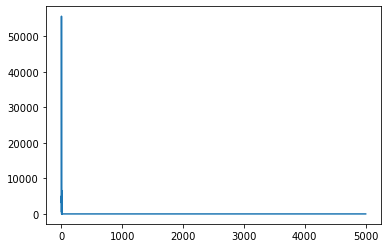

In [316]:
plt.plot(range(len(cost)),cost)  #range(len(cost)) is the number of iterations 

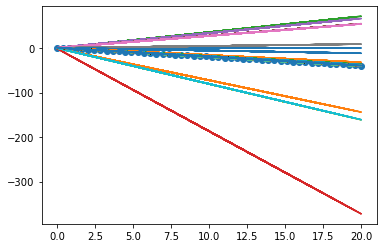

In [317]:
plt.scatter(x[:,1],y)
for i in  pred:
    plt.plot(x[:,1],i)

In [318]:
f = x @ theta_min.T
print(np.concatenate((f,y),axis=1))

[[-37.3673465  -37.36734694]
 [-27.57142896 -27.57142857]
 [-38.99999943 -39.        ]
 [-21.85714373 -21.85714286]
 [ -5.53061449  -5.53061224]
 [ -0.63265572  -0.63265306]
 [-12.87755265 -12.87755102]
 [-36.55102004 -36.55102041]
 [  0.18367074   0.18367347]
 [-21.04081727 -21.04081633]
 [-16.14285849 -16.14285714]
 [-15.32653203 -15.32653061]
 [-18.59183788 -18.59183673]
 [ -3.89796157  -3.89795918]
 [-38.18367296 -38.18367347]
 [ -9.6122468   -9.6122449 ]
 [-34.91836712 -34.91836735]
 [-12.06122619 -12.06122449]
 [-23.48979665 -23.48979592]
 [-11.24489972 -11.24489796]
 [-31.65306127 -31.65306122]
 [-14.51020557 -14.51020408]
 [-32.46938773 -32.46938776]
 [ -8.79592034  -8.79591837]
 [ -3.08163511  -3.08163265]
 [ -2.26530864  -2.26530612]
 [-29.20408188 -29.20408163]
 [-20.2244908  -20.2244898 ]
 [-30.83673481 -30.83673469]
 [-28.38775542 -28.3877551 ]
 [-16.95918496 -16.95918367]
 [ -1.44898218  -1.44897959]
 [ -4.71428803  -4.71428571]
 [-22.67347019 -22.67346939]
 [-13.69387911

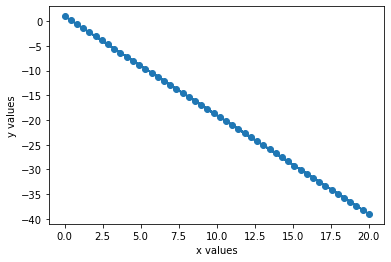

In [319]:
_ = plt.scatter(x[:,1],y)
_ = plt.xlabel('x values')
_ = plt.ylabel('y values')
_ = plt.plot(x[:,1],f)

Text(0, 0.5, 'Cost Value')

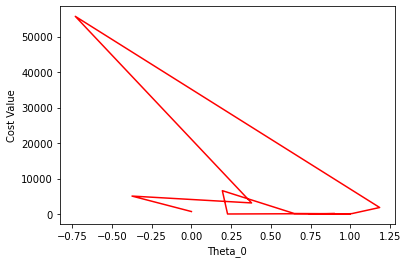

In [320]:
thetas = np.squeeze(np.array(thetas))
fig,ax = plt.subplots()
ax.plot(thetas[:,0], cost ,'r')

ax.set_xlabel('Theta_0')
ax.set_ylabel('Cost Value')

Text(0, 0.5, 'Cost Value')

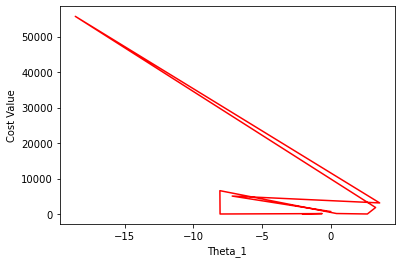

In [321]:
thetas = np.squeeze(np.array(thetas))
fig,ax = plt.subplots()
ax.plot(thetas[:,1], cost ,'r')

ax.set_xlabel('Theta_1')
ax.set_ylabel('Cost Value')